To start, upload the astropy package, which we will use to access the data table.  Additionally, import all relevant Python packages.


In [5]:
!pip install astropy

In [1]:
import math
#import yeah
#yes
#hello
#import yeah yeah
import numpy as np

#import sdhsiuafhsdhfkjsdhfkjsdhfkjhdsfkjhdskjhfkj
import matplotlib
import hfpy
import h5py
#hellos
#yes
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Introduction

What is the speed of the fastest star in the vicinity of the Sun?  In this lab exercise, you will mine through data from the *Gaia* satellite to see for yourself!  The *Gaia* satellite (pictured below) was launched in 2013 and is providing an unprecedent look at the Milky Way galaxy.  It will ultimately provide the complete position and velocity information for nearly a billion stars in the Galaxy.  This is about 1% of all the stars in the Galaxy, and marks a huge advance over previous missions.

We expect that most stars in the Milky Way are gravitationally bound to the Galaxy, which is another way of saying that their velocities fall below the escape velocity.  However, there are a variety of reasons why unbound stars might be flying around.  For example:

1. A star that is ejected from the Milky Way's disk because a nearby supernova exploded;
2. A star that is ejected from the center of the Milky Way due to its interaction with our black hole;
3. A star that is stripped from a smaller galaxy that is passing through the Milky Way.

Identifying these unbound stars is an important first step in understanding the interesting mechanisms that can produce them.  Your goal for this lab is to curate a candidate list of stars from the *Gaia* data that have a significant probability of being unbound to the Milky Way.



![alt text](https://earth.esa.int/documents/163813/1067156/GAIA_Auto1B)

# Theoretical Model of the Milky Way Escape Velocity

Before jumping into the data analysis part of the lab, we will build a theoretical model for the gravitational potential of the Milky Way and plot its escape velocity.

A word of caution for what follows: Coordinate definitions are going to be critical, so you should play close attention to whether you are using spherical or cylindrical coordinates.  In general, we will use a lower-case "r" to denote the radius to the center of the Galaxy in spherical coordinates.  We will use an upper-case "R" to denote the radius to the center of the Galaxy in cylindrical coordinates.  Also in cylindrical, "z" is the vertical distance above and below the plane of the Milky Way's disk.  In general,

$$ r^2 = R^2 + z^2 $$

### **Exercise 1**
**[5 points]** 

In the following markdown box, show your derivation for the escape velocity as a function of $-|\Phi(r)|$, the gravitational potential energy of the Milky Way, where $r$ is the radial distance to the Galactic Center (in spherical coordinates).

*Important* : Our convention is to take the potential energy per star mass.  Therefore, $\Phi(r)$ as given has the mass of the star divided out.

Enter your derivation here.

By Conservation of Energy, we find that

$$\Delta V = -\Delta T$$

Since 

$$-|\Phi(r)| = \frac{V}{m_s}$$ 

and 

$$T = \frac{1}{2}m_s v_e^2,$$

we see that

$$\frac{1}{2} v_e^2 = |\Phi(r)|$$

Therefore, we derive

$$ v_e = \sqrt{2|\Phi(r)|}$$

### **Exercise 2**
**[20 points]**

We will model the Milky Way potential as a sum of three components: 

1. A dark matter halo 
2. A stellar disk 
3. A stellar bulge

The gravitational potentials for these three components are given below. Assuming this model, plot the total Milky Way escape velocity for $R = 0-30$ kpc and $z=0$ kpc.  On the same plot, show the individual contributions from the dark matter halo, stellar disk, and bulge.  Using these results, 

*   Describe the role that each component plays in setting the escape velocity as $R\rightarrow0$ kpc and as $R \rightarrow 30$ kpc.
*   Estimate the escape velocity near the Sun ($R=8$ kpc, $z=0$ kpc).


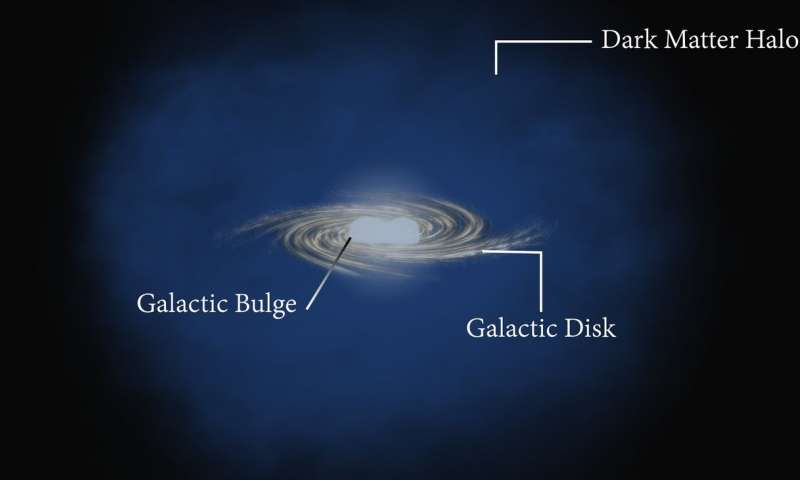

Image Credit: Australian National University



**Dark Matter Potential**:  In this model, the stellar disk is surrounded by a vast "halo" of dark matter.  Dark matter is a form of matter that we believe exists due to its gravitational effect on galaxies (amongst other pieces of evidence), however we do not yet know the fundamental particle nature of dark matter.  It is referred to as "dark" because it does not emit visible light, so we cannot see it with standard optical surveys.  We hypothesize that the potential of the dark matter halo is given by:

$$ \Phi_h(r) = - \frac{G M_h}{r} \ln\Big(1+\frac{r}{r_s}\Big)  \, $$

where $G$ is Newton's gravitational constant, $M_h$ is the halo mass and $r_s$ is a specified length scale.  You may assume that $M_h = 8 \times 10^{11} M_\odot$ and $r_s = 16$ kpc.  ($M_\odot$ is the unit for solar mass.)



**Stellar Disk Potential**:  Perhaps the most iconic image of the Milky Way galaxy is its stellar disk.  The gravitational potential for the stellar disk is

$$ \Phi_d(R, z) = \frac{-G M_d}{\sqrt{R^2 + \big(a + \sqrt{z^2 + b^2}\big)^2}} $$

where $M_d$ is the disk mass, and $a$ and $b$ are specified length scales.  You may take $M_d = 7\times 10^{10}~M_\odot$, $a= 3$ kpc and $b=0.28$ kpc.

**Stellar Bulge**: The bulge is a roughly spherical distribution of stars concentrated near the center of the Milky Way.  We will model its potential as follows:

$$ \Phi_b(r) = - \frac{G M_b}{r + r_b} $$

where $M_b$ is the bulge mass and $r_b$ is a specified scale length.  You may take $M_b = 5\times10^9~M_\odot$ and $r_b = 1$ kpc. 

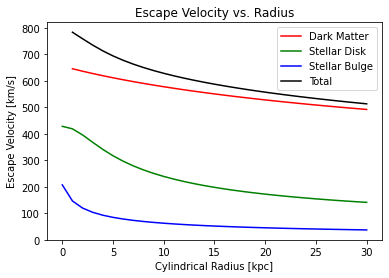


As R --> 0 kpc, the stellar bulge has small contributions to escape velocity, while the stellar disk and dark matter have significant contributions. However, as R --> 30 kpc, the escape velocity is almost entirely comprised of dark matter contributions.
Escape velocity near the Sun:  650.4636627958023  km/s


In [167]:
G = 4.3 * 10**-6

M_h = 8 * 10**11
r_s = 16

M_d = 7 * 10**10
a = 3
b = 0.28

M_b = 5 * 10**9
r_b = 1

def little_r(R, z):
    return np.sqrt(R**2 + z**2)

def dark_matter_potential(r):
    return (-1 * G * M_h / r) * np.log(1 + (r / r_s))

def stellar_disk_potential(R, z):
    return (-1 * G * M_d) / np.sqrt(R**2 + (a + np.sqrt(z**2 + b**2))**2)

def stellar_bulge_potential(r):
    return (-1 * G * M_b) / (r + r_b)

def escape_velocity(phi):
    return np.sqrt(2*np.abs(phi))

def total_potential(R,z):
    r=little_r(R,z)
    return (dark_matter_potential(r) + stellar_disk_potential(R,z) + stellar_bulge_potential(r))

R = np.arange(0,31)
z = np.zeros(R.shape[0])
r = little_r(R, z)

dark_matter_potentials = dark_matter_potential(r)
stellar_disk_potentials = stellar_disk_potential(R, z)
stellar_bulge_potentials = stellar_bulge_potential(r)
total_potentials = total_potential(R,z)

dark_matter_escape_velocity = escape_velocity(dark_matter_potentials)
stellar_disk_escape_velocity = escape_velocity(stellar_disk_potentials)
stellar_bulge_escape_velocity = escape_velocity(stellar_bulge_potentials)
total_escape_velocity = escape_velocity(total_potentials)

plt.plot(R, dark_matter_escape_velocity, color = "red", label = "Dark Matter")
plt.plot(R, stellar_disk_escape_velocity, color = "green", label = "Stellar Disk")
plt.plot(R, stellar_bulge_escape_velocity, color = "blue", label = "Stellar Bulge")
plt.plot(R, total_escape_velocity, color = "black", label = "Total")

plt.legend()
plt.xlabel("Cylindrical Radius [kpc]")
plt.ylabel("Escape Velocity [km/s]")
plt.title("Escape Velocity vs. Radius")
plt.show()

print()
print("As R --> 0 kpc, the stellar bulge has small contributions to escape velocity, while the stellar disk and dark matter have significant contributions. However, as R --> 30 kpc, the escape velocity is almost entirely comprised of dark matter contributions.")
print("Escape velocity near the Sun: ", total_escape_velocity[8], " km/s")

# *Gaia* Data Analysis

The data file (gaia_spectro.hdf5) can be downloaded from the link provided in Footnote 3 of [this paper](https://arxiv.org/pdf/1806.02324.pdf).  You can reference Table B1 in that paper's appendix to see the format of the table.  

You can use the following code cell to read in the data table.  Make sure to update the filename appropriately for your own directory!

In [25]:
filename='C:/Users/amirs/Desktop/gaia_spectro.hdf5'
data = Table.read(filename)

For a complete description of each of the columns, you can type

`data.meta['COMMENT']`

To access the data from any particular column as an array, just type

`data['<column name>']`

For example, to pull up an array of the cylindrical radius $R$ for each star, you would type

`data['R']`

and the error on this value is obtained using

`data['R_err']`

### **Exercise 3**
**[20 points]**

Read in the data file and apply the cleaning cuts that are described below.  After applying each cut sequentially,  

*   Show how many stars in your dataset survive the selection
*   Convince the reader (either through a figure or some other summary statistic) that you have applied the selection cut correctly



Apply the selection cuts in the following order:


1.  **Best Star Selection** : There can be potential issues with the derivation of the stellar parameters in the *Gaia* data.  For that reason, we will want to select the subset of *Gaia* stars with  no recorded issues.  These are the stars for which `data['best'] == 1`

2.  **Solar Neighborhood Selection** : We will focus on stars that are located near the Sun (i.e., in the 'solar neighborhood').  Specifically, we require that `data['s'] < 3`. 

3.  **Giants Selection** : We will restrict to a class of stars called 'giants'.  These are selected by requiring that the stellar surface gravity satisfies `data['logg'] < 3` and that the (log of the) stellar  effective temperature satisfies `'log10_teff' < 3.73`.


3318118  stars survive the best star selection.


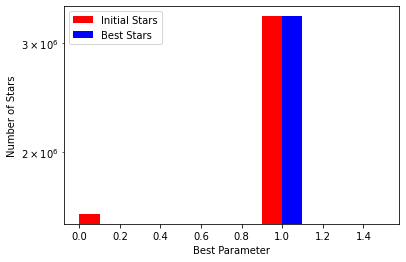

In [26]:
best_star_data = data[(data['best'] == 1)]
print(len(best_star_data), " stars survive the best star selection.")

plt.hist(data['best'], color = "red", label = 'Initial Stars')
plt.hist(best_star_data['best'], color = "blue", label = 'Best Stars')
plt.yscale('log')
plt.legend()
plt.xlabel('Best Parameter')
plt.ylabel('Number of Stars')
plt.show()

2735140  stars survive the solar neighborhood selection.


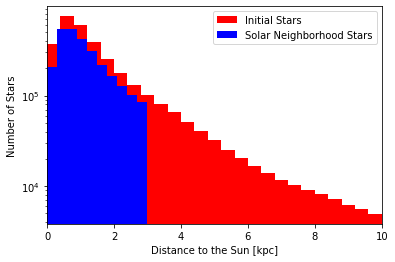

In [27]:
solar_neighborhood_data = best_star_data[(best_star_data['s'] < 3)]
print(len(solar_neighborhood_data), " stars survive the solar neighborhood selection.")

plt.hist(best_star_data['s'], range = (0, 10), color = "red", bins = 25, label = 'Initial Stars')
plt.hist(solar_neighborhood_data['s'], color = "blue", bins = 10, label = 'Solar Neighborhood Stars')
plt.yscale('log')
plt.xlim([0, 10])
plt.legend()
plt.xlabel('Distance to the Sun [kpc]')
plt.ylabel('Number of Stars')
plt.show()

421366  stars survive the giants selection.


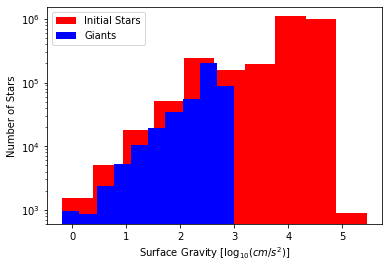

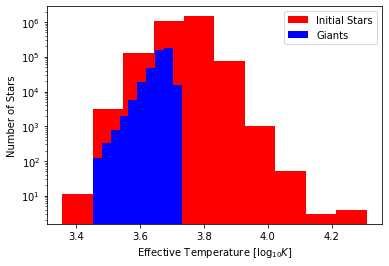

In [29]:
giants_data = solar_neighborhood_data[(solar_neighborhood_data['logg'] < 3) & (solar_neighborhood_data['log10_teff'] < 3.73)]
print(len(giants_data), " stars survive the giants selection.")

plt.hist(solar_neighborhood_data['logg'], color = "red", label = 'Initial Stars')
plt.hist(giants_data['logg'], color = "blue", label = 'Giants')
plt.yscale('log')
plt.legend()
plt.xlabel('Surface Gravity [$\log_{10}(cm/s^2)$]')
plt.ylabel('Number of Stars')
plt.show()

plt.hist(solar_neighborhood_data['log10_teff'], color = "red", label = 'Initial Stars')
plt.hist(giants_data['log10_teff'], color = "blue", label = 'Giants')
plt.yscale('log')
plt.legend()
plt.xlabel('Effective Temperature [$\log_{10}K$]')
plt.ylabel('Number of Stars')
plt.show()

### **Exercise 4**
**[20 points]**

You have the cylindrical velocity components ($v_R$, $v_\phi$, and $v_z$) for each star in your list.  Use this information to:

1.   Calculate the total speed of each star.

2.   Calculate the uncertainty, $\sigma_v$, in the total speed for each star.  This will require that you appropriately propagate errors for each of the star's velocity components.  Show your derivation of the total speed uncertainty.  You can start from the following uncertainty relationship:

$$ \sigma_f = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 \sigma_x^2 
+ \left(\frac{\partial f}{\partial y}\right)^2 \sigma_y^2 +\left(\frac{\partial f}{\partial z}\right)^2 \sigma_z^2}$$

for any quantity $f(x, y, z)$.

3.  Use plt.hexbin() to plot the fractional speed uncertainty ($\sigma_v/v$) for each star as a function of its total speed.  You might find it helpful to set

```xscale='log', yscale='log', bins='log'```

in the hexbin parameters.



$$ v(v_R, v_\phi, v_z) = \sqrt{v_R^2 + v_\phi^2 + v_z^2}$$

Taking the partial derivatives, we find 

$$ \frac{\partial v}{\partial v_R} = \frac{v_R}{\sqrt{v_R^2 + v_\phi^2 + v_z^2}} = \frac{v_R}{v}$$

$$ \frac{\partial v}{\partial v_\phi} = \frac{v_\phi}{\sqrt{v_R^2 + v_\phi^2 + v_z^2}} = \frac{v_\phi}{v}$$

$$ \frac{\partial v}{\partial v_z} = \frac{v_z}{\sqrt{v_R^2 + v_\phi^2 + v_z^2}} = \frac{v_z}{v}$$

Inputting these derivatives into the given uncertainty function, we get:

$$ \sigma_v = \sqrt{\left(\frac{v_R}{v}\right)^2 \sigma_R^2 + \left(\frac{v_\phi}{v}\right)^2 \sigma_\phi^2  + \left(\frac{v_z}{v}\right)^2 \sigma_z^2}  $$

$$ \sigma_v = \frac{1}{v}\sqrt{(v_R \sigma_R)^2 + (v_\phi \sigma_\phi)^2  + (v_z \sigma_z)^2} $$

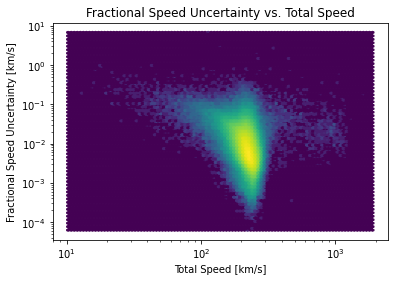

In [30]:
def speed(data) :
    return np.sqrt(data['vR']**2 + data['vphi']**2 + data['vz']**2)

def error(data):
  error = np.sqrt((data['vR'] * data['vR_err'])**2 + (data['vphi'] * data['vphi_err'])**2 + (data['vz'] * data['vz_err'])**2) / speed(data)
  return error 

def fractional_error(data):
  return error(data) / speed(data)

plt.hexbin(speed(giants_data), fractional_error(giants_data), xscale = 'log', yscale = 'log', bins = 'log')
plt.xlabel('Total Speed [km/s]')
plt.ylabel('Fractional Speed Uncertainty [km/s]')
plt.title("Fractional Speed Uncertainty vs. Total Speed")
plt.show()

### **Exercise 5**
**[15 points]**

Moving forward, we will only focus on stars with relatively small speed uncertainties.  For this exercise, 

1.   Select stars with a fractional speed uncertainty $\leq 0.3$.  How many stars survive this selection cut?  Convince the reader that your selection cut was applied correctly.
2.   What is the average speed of the stars that survive this selection cut?  How does the value you get compare to the velocity of the Sun about the center of the Galaxy.  For the Sun, $(v_R, v_\phi, v_z) \sim (0, 220, 0)$ km/s.



421205  stars survive the giants selection.


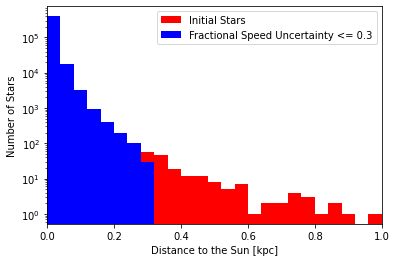

The average speed of the stars that survive the fractional speed uncertainty selection cut is  220.798 km/s.
This velocity value is very close to that of the Sun, 220 km/s (within 0.5%).


In [145]:
fractional_speed_uncertainty = giants_data[(fractional_error(giants_data)<=0.3)]
print(len(fractional_speed_uncertainty), " stars survive the giants selection.")

plt.hist(fractional_error(giants_data), range = (0,1), color = "red", bins = 25, label = 'Initial Stars')
plt.hist(fractional_error(fractional_speed_uncertainty), range=(0,1), color = "blue", bins = 25, label = 'Fractional Speed Uncertainty <= 0.3')
plt.yscale('log')
plt.xlim([0, 1])
plt.legend()
plt.xlabel('Distance to the Sun [kpc]')
plt.ylabel('Number of Stars')
plt.show()

average_speed_stars = np.around(np.average(speed(fractional_speed_uncertainty)), 3)
print("The average speed of the stars that survive the fractional speed uncertainty selection cut is ", average_speed_stars, "km/s.")
print("This velocity value is very close to that of the Sun, 220 km/s (within 0.5%).")

### **Exercise 6**
**[20 points]**

To identify a candidate list of high-velocity stars, choose those stars  whose observed speed is greater than the theoretically predicted escape speed (at the star's position) by more than 5 times the speed error.  

1.   How many candidates do you find?  What fraction of the total dataset (after applying the fractional error selection) do they comprise?

2.   What is the mean speed of the stars in your candidate list?  What is the maximum and minimum speed of the stars in your candidate list?

3. Make a [quiver plot](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/) for your candidate stars.  The $x$-axis should correspond to the (cylindrical) radial position of the star, while the $z$-axis should correspond to its vertical distance from the plane.  Each star should be denoted by an arrow whose $x$-direction is set by $v_R$ and $y$-direction is set by $v_z$.  Describe how the Sun would look like on this plot.  How do your candidate stars differ from the Sun's expected behavior?



Potential Unbound Stars:  265
Fraction of total dataset:  0.0006291473273109294
Mean speed:  932.724957683985
Maximum speed:  1894.5050499898282
Minimum speed:  688.5674544484727


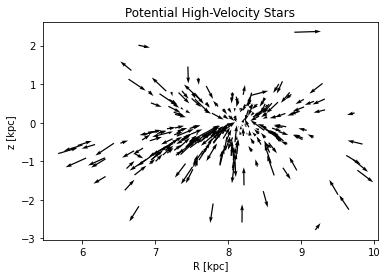

In [166]:
theo_speed_fsu = speed(fractional_speed_uncertainty)
error_fsu = error(fractional_speed_uncertainty)
total_potential_fsu = total_potential(fractional_speed_uncertainty['R'], fractional_speed_uncertainty['z'])
escape_vel_fsu = escape_velocity(total_potential_fsu)
high_velocity_stars = fractional_speed_uncertainty[np.divide(theo_speed_fsu - escape_vel_fsu, error_fsu)>5]


print("Potential Unbound Stars: ", len(high_velocity_stars))
print("Fraction of total dataset: ", len(high_velocity_stars)/len(fractional_speed_uncertainty))

print("Mean speed: ", np.mean(speed(high_velocity_stars)))
print("Maximum speed: ", np.max(speed(high_velocity_stars)))
print("Minimum speed: ", np.min(speed(high_velocity_stars)))

plt.quiver(high_velocity_stars['R'], high_velocity_stars['z'], high_velocity_stars['vR'], high_velocity_stars['vz'])
plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Potential High-Velocity Stars')
plt.show()